In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
pd.DataFrame(boston.target).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
boston.columns = boston.feature_names

In [ ]:
data = datasets.load_boston()
print(data)

df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df.to_csv('boston.txt', sep = ',', index = False)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
X=df.loc[:, df.columns == 'RAD']
y=df.loc[:, df.columns == 'TAX']

In [ ]:
X

,RAD
0,1.0
1,2.0
2,2.0
3,3.0
4,3.0
...,...
501,1.0
502,1.0
503,1.0
504,1.0


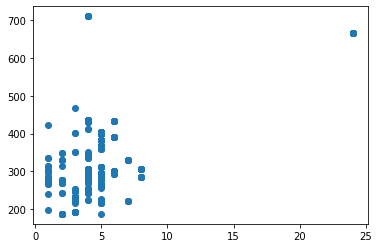

In [ ]:
plt.scatter(X,y)

In [ ]:
ds=pd.concat((X,y), axis=1)

In [ ]:
ds

,RAD,TAX
0,1.0,296.0
1,2.0,242.0
2,2.0,242.0
3,3.0,222.0
4,3.0,222.0
...,...,...
501,1.0,273.0
502,1.0,273.0
503,1.0,273.0
504,1.0,273.0


In [ ]:
Res1F = smf.ols('y~X', ds).fit()
Res2F = smf.ols('y ~ X+I(X**2)', ds).fit()
Res3F = smf.ols('y ~ X+I(X**2)+I(X**3)', ds).fit()

print(Res1F.summary())
print(Res2F.summary())
print(Res3F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2435.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          4.13e-195
Time:                        20:59:20   Log-Likelihood:                -2865.7
No. Observations:                 506   AIC:                             5735.
Df Residuals:                     504   BIC:                             5744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.9927      4.612     52.037      0.0

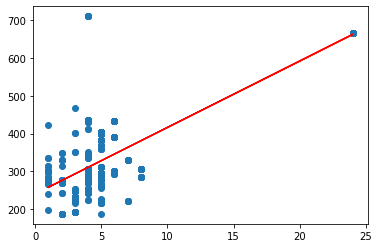

In [ ]:
plt.scatter(X, y)
plt.plot(X, Res1F.fittedvalues, color='r')
plt.show()

Linear Regression - sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [ ]:
k = reg.coef_
n = reg.intercept_

print(k)
print(n)

[[17.61831445]]
[239.99269677]


In [ ]:
y_predict = k*X + n

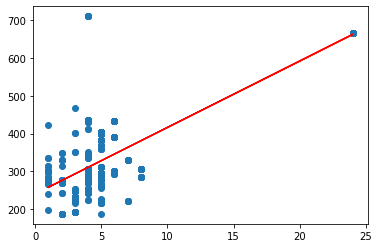

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_predict, color='red')

In [ ]:
#reg.predict(np.array([[100]]))

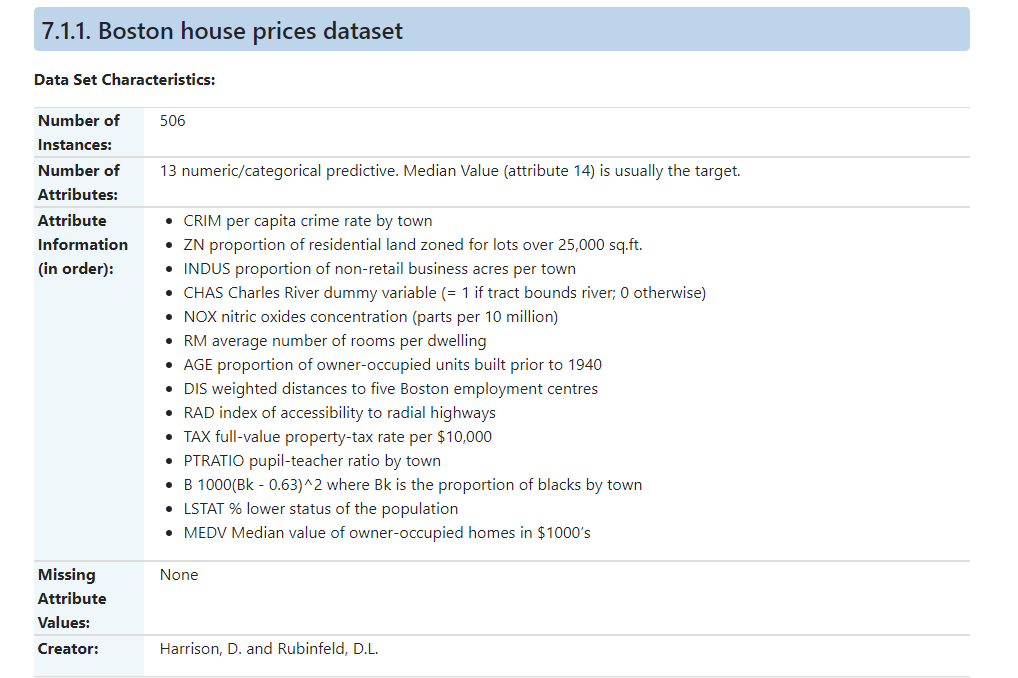

Multiple regression

In [ ]:
X1=df.loc[:, df.columns != 'CRIM']

In [ ]:
X1=sm.add_constant(X1)
X1

,const,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
model1=sm.OLS(y, X1).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.745e+30
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:59:23   Log-Likelihood:                 13480.
No. Observations:                 506   AIC:                        -2.693e+04
Df Residuals:                     493   BIC:                        -2.688e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.268e-13   7.08e-13      0.461      0.6

Multiple regression (two features dependence) 

In [ ]:
model2=smf.ols("CRIM ~ RAD + TAX", df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.95e-55
Time:                        20:59:24   Log-Likelihood:                -1680.3
No. Observations:                 506   AIC:                             3367.
Df Residuals:                     503   BIC:                             3379.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2451      1.120     -2.898      0.0

In [ ]:
model2=smf.ols("CRIM ~ RAD * TAX", df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     111.7
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.14e-55
Time:                        20:59:24   Log-Likelihood:                -1677.0
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3419      2.101      0.639      0.5

Polynomial regression

In [ ]:
Result_pol= smf.ols('y ~ X+I(X**2)+I(X**3)', ds).fit()

print(Result_pol.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     869.1
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          2.72e-198
Time:                        20:59:24   Log-Likelihood:                -2850.5
No. Observations:                 506   AIC:                             5709.
Df Residuals:                     502   BIC:                             5726.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.9798     20.838      9.549      0.0

Unconditional & Conditional Probabilities

unconditional

In [ ]:
att = ['TAX','CRIM']
data = df[att]
data.head()

In [ ]:
data.shape

In [ ]:
dataTemp=data['TAX'].value_counts()
dataTemp

In [ ]:
print(dataTemp.sum())
data.index

In [ ]:
dataTemp.index

In [ ]:
P_tax=pd.DataFrame((dataTemp/dataTemp.sum()).sort_index())
P_tax.columns=["Probability"]

In [ ]:
P_tax.plot.bar()
plt.ylabel("Probability")
plt.xlabel("Tax per 10,000$")
print(P_tax)

In [ ]:
print(data["CRIM"].values.max())
print(data["CRIM"].values.min())

In [ ]:
dataTemp=(data["CRIM"]>=45).value_counts()
dataTemp

In [ ]:
dataTemp=(data["CRIM"]>=15).value_counts()
P_high=pd.DataFrame(dataTemp/dataTemp.sum())
P_high.index=["Low","High"]
P_high.columns=["Probability"]

print(P_high)
P_high.plot.bar()
plt.xlabel("Crime rate")
plt.ylabel("Probability")

In [ ]:
dataTemp=data[data["CRIM"]>=45]["TAX"]
print(dataTemp)

In [ ]:
dataTemp1=data['TAX'].value_counts().sort_index()
dataTemp1

In [ ]:
dataTemp2 = dataTemp.value_counts().sort_index()
dataTemp2

uncodnitional

In [ ]:
temp=df.TAX.value_counts().sort_index()
temp

187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Name: TAX, Length: 66, dtype: int64

       Probability
187.0     0.001976
188.0     0.013834
193.0     0.015810
198.0     0.001976
216.0     0.009881
...            ...
432.0     0.017787
437.0     0.029644
469.0     0.001976
666.0     0.260870
711.0     0.009881

[66 rows x 1 columns]
Probability    1.0
dtype: float64
Probability    0.26087
dtype: float64


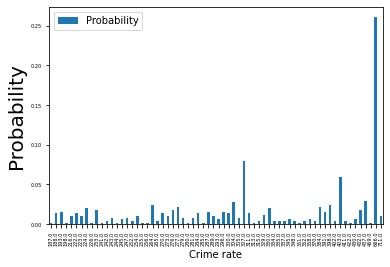

In [ ]:
P_crime=pd.DataFrame((temp/temp.sum()).sort_index())
P_crime.columns=['Probability']

P_crime.plot.bar(fontsize=5)
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Crime rate')
print(P_crime)
print(P_crime.sum())
print(P_crime.max())


conditional prob

In [ ]:
df.RM.unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [ ]:
data_temp=(df.RM<6).value_counts()
data_temp

False    333
True     173
Name: RM, dtype: int64

In [ ]:
data_temp1=((df.RM>=6)&(df.RM<=7)).value_counts()
data_temp1

True     269
False    237
Name: RM, dtype: int64

In [ ]:
data_temp2=(df.RM>7).value_counts()
data_temp2

False    442
True      64
Name: RM, dtype: int64

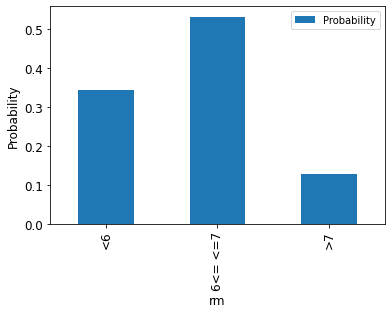

         Probability
<6          0.341897
6<= <=7     0.531621
>7          0.126482
Probability    1.0
dtype: float64
Probability    0.531621
dtype: float64


In [ ]:
P_rm = pd.DataFrame([data_temp[True], data_temp1[True], data_temp2[True]])/len(df)
P_rm.index = ["<6","6<= <=7",">7"]
P_rm.columns = ["Probability"]

P_rm.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("rm",fontsize=12)
plt.show()
print(P_rm)
print(P_rm.sum())
print(P_rm.max())

In [ ]:
data_temp3 = ((df.RM>=6) & (df.RM<=7) & (df.TAX<=469)).value_counts()
data_temp3

False    309
True     197
dtype: int64

In [ ]:
len(data_temp1)

2

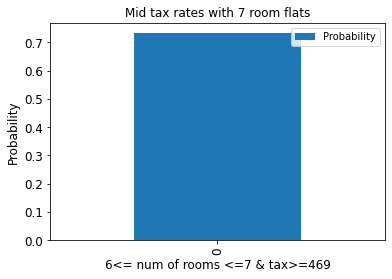

   Probability
0     0.732342
Probability    0.732342
dtype: float64
True     369
False    137
Name: TAX, dtype: int64


In [ ]:
P_rm_tax = pd.DataFrame([data_temp3[True]])/(data_temp1[True])
P_rm_tax.columns = ["Probability"]

P_rm_tax.plot.bar(fontsize=12)
plt.title("Mid tax rates with 7 room flats")
plt.ylabel("Probability",fontsize=12)
plt.xlabel("6<= num of rooms <=7 & tax>=469",fontsize=12)
plt.show()
print(P_rm_tax)
print(P_rm_tax.sum())
print((df.TAX<=469).value_counts())

Parameters of ditribution of single variables


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.quantile(0.85)

CRIM         8.008307
ZN          28.000000
INDUS       18.100000
CHAS         0.000000
NOX          0.693000
RM           6.940000
AGE         97.300000
DIS          6.267675
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.900000
LSTAT       19.805000
Name: 0.85, dtype: float64

In [ ]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

In [ ]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [ ]:
df.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

Parameters of the joint distribution

In [ ]:
#covariance
df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520


In [ ]:
#correlation coefficient
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
df.cov()['TAX']['CRIM']/(df.std()['TAX']*df.std()['CRIM'])

0.5827643120325847

Confidence intervals of certain parameters

In [ ]:
mean_estimators = []

sample_size=500
number_of_mean_estimators=50
for x in range(number_of_mean_estimators):
    sample=df['TAX'].sample(sample_size)
    mean_estimators.append(sample.values.mean())

In [ ]:
alpha=0.05
std=df['TAX'].std()

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)
margin = Quantile * (std/sample_size**0.5)

In [ ]:
confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(mean_estimators[0])
print(confidence_interval)

409.06
(394.2873418854057, 423.8326581145943)


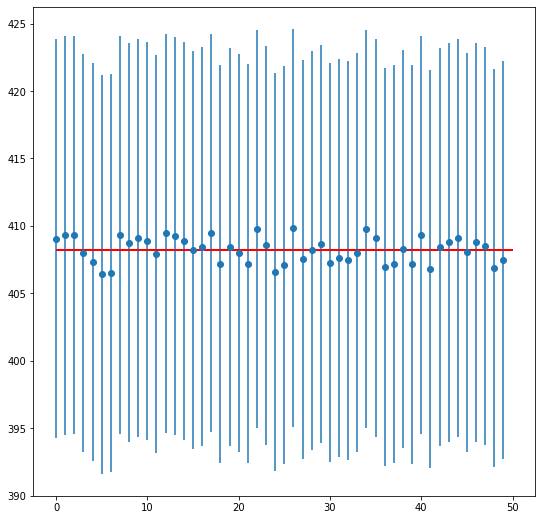

In [ ]:
CIs=[]
for i in range(0,number_of_mean_estimators):
    CIs.append((mean_estimators[i] - margin, mean_estimators[i] + margin))

plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, number_of_mean_estimators),
             y=mean_estimators[0:number_of_mean_estimators],
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_mean_estimators,
           y=df['TAX'].mean(),
           linewidth=2.0,
           color="red")

Estimation of PDF based on histogram and nonparametric hypothesis testing of distributions using Kolomotgorov-Smirnov and chi-squared test

In [ ]:
#chi-square
stats.chisquare(df["TAX"])

Power_divergenceResult(statistic=35137.427830060806, pvalue=0.0)

In [ ]:
#Kolmogorov and Smirnov test
stats.kstest(df['TAX'], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
#not from normal distribution => p=0

In [ ]:
#Kolmogorov and Smirnov test
stats.kstest(df['TAX'], "uniform")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
#not uniform

In [ ]:
df['TAX'].min()

187.0

In [ ]:
df['TAX'].mean()

408.2371541501976

In [ ]:
df['TAX'].max()

711.0

In [ ]:
#Kolmogorov and Smirnov test
stats.kstest(df['TAX'], "norm", args=(187,450))

KstestResult(statistic=0.5, pvalue=1.6871111181943794e-117)

In [ ]:
#first part that I put as args IS normally distributed

In [ ]:
example='TAX'
attributes=[example]
dfs=df[attributes]
dfs.head()

,TAX
0,296.0
1,242.0
2,242.0
3,222.0
4,222.0


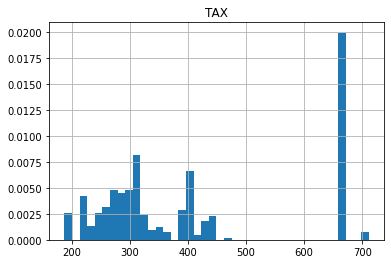

In [ ]:
hist=dfs.hist(density=True, bins=40)

In [ ]:
sample_size=100

stats.kstest(dfs.sample(sample_size).dropna().values.T, cdf='norm',args=(dfs.dropna().values.mean(), dfs.dropna().values.std()))

KstestResult(statistic=0.9639268799750443, pvalue=0.07214624004991133)

In [ ]:
#not from normal distribution; p<0.1

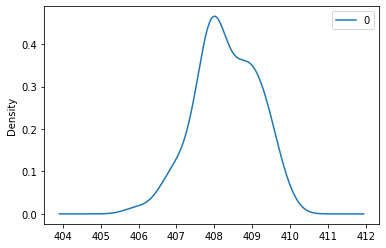

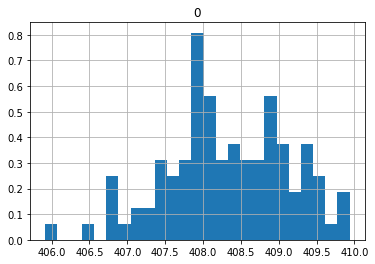

In [ ]:
# Let's test the distribution of the ME estimators: #this is Central Limit Theorem which says that ME estimators should be normally distributed
ME_estimators = []       

sample_size=500
number_of_estimator_samples=100   
for x in range(number_of_estimator_samples):
    
    sample=dfs.sample(sample_size)
    ME_estimators.append( sample.dropna().values.mean() )
    
#estimated PDFis aspproximately normal
pd.DataFrame(ME_estimators).plot(kind="density")   

# histogram of the means:
hist = pd.DataFrame(ME_estimators).hist(density=True,bins=25) 

In [ ]:
stats.kstest(ME_estimators, cdf='norm',args=(dfs.dropna().values.mean(), dfs.dropna().values.std()/sample_size**0.5))
#mathematical estimators are from normal distribution

KstestResult(statistic=0.4118861097973433, pvalue=7.301873130387911e-16)

Parametric hypothesis testing

In [ ]:
#Is ME in the confidence interval?

mean_estimators = []

sample_size=500
number_of_mean_estimators=50
for x in range(number_of_mean_estimators):
    sample=df['TAX'].sample(sample_size)
    mean_estimators.append(sample.values.mean())

In [ ]:
alpha=0.05
std=df['TAX'].std()

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)
margin = Quantile * (std/sample_size**0.5)

In [ ]:
confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(mean_estimators[0])
print(confidence_interval)

408.312
(393.5393418854057, 423.08465811459433)


In [ ]:
p_value=2*(1-stats.t.cdf(Quantile,df=sample_size-1))
    
p_value

0.050556125321213896

In [ ]:
#We will reject H0, since p_value<0.1 what is H0? What is the hypothesis? That ME is NOT within the CI, so we reject it and we see that ME is within CI:
#CI = (393.56934188540566, 423.1146581145943)
#ME = 408.342
#with 1-alpha reliability => 1-0.05=0.95 so we are 95% sure that this is true

alpha-how much error we allow
